In [1]:
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Cleaning and Preprocessing Data for Machine Learning

Preprocessing your data is the process of preparing your data to be analyzed. As you can imagine, there is no "correct" way to do this. The approach taken for this depends on the data and the type of analysis. In this notebook, we'll look at encoding categorical variables, scaling, and normalizing.

**Dataset:**  brain_categorical.csv

**Source:** R.J. Gladstone (1905). ["A Study of the Relations of the Brain to the Size of the Head", Biometrika, Vol. 4, pp105-123](https://doi.org/10.1093/biomet/4.1-2.105)

**Description:** Brain weight (grams) and head size (cubic cm) for 237 adults classified by gender and age group.

Variables/Columns
- **GENDER:** Gender  \[*Male* or *Female*\]
- **AGE:** Age Range  \[*20-46* or *46+*\]
- **SIZE:** Head size (cm^3)
- **WEIGHT:** Brain weight (grams)



### Read the csv file into a pandas DataFrame

In [25]:
Strain_Frame = pd.read_csv('../Resources/Strain_Frame.csv')
print("Strain_Frame:",Strain_Frame.shape)
Strain_Frame.head()


Strain_Frame: (2351, 186)


,Strain,Rating,StrainType,Type: Hybrid,Type: Indica,Type: Sativa,Effect: Creative,Effect: Energetic,Effect: Tingly,Effect: Euphoric,...,Descriptor: Potent,Descriptor: Body High,Descriptor: Head High,Descriptor: Daytime,Descriptor: Nighttime,Descriptor: Outside,Descriptor: Creative,Descriptor: Psychedelic,Descriptor: Lazy,Descriptor: Calm
0,100 Og,4.0,3,1,0,0,1,1,1,1,...,1,1,1,0,0,0,0,0,0,0
1,98 White Widow,4.7,3,1,0,0,1,1,0,0,...,1,1,0,0,0,0,0,0,0,0
2,1024,4.4,1,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,13 Dawgs,4.2,3,1,0,0,1,0,1,0,...,1,1,0,0,0,0,1,0,0,0
4,24K Gold,4.6,3,1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


### Split data and labels and reshape

In [55]:
X = Strain_Frame[["StrainType","Effect: Creative", "Effect: Energetic", "Effect: Tingly", "Effect: Euphoric", "Effect: Relaxed", "Effect: Aroused", "Effect: Happy", "Effect: Uplifted", "Effect: Hungry", "Effect: Talkative", "Effect: Sleepy","Effect: Focused", "Terpenes: Earthy", "Terpenes: Sweet", "Terpenes: Citrus", "Terpenes: Flowery", "Terpenes: Violet", "Terpenes: Diesel", "Terpenes: Spicy/Herbal", "Terpenes: Sage", "Terpenes: Woody", "Terpenes: Apricot", "Terpenes: Grapefruit", "Terpenes: Orange",  "Terpenes: None", "Terpenes: Pungent", 
"Terpenes: Grape", "Terpenes: Pine", "Terpenes: Skunk", "Terpenes: Berry", "Terpenes: Pepper", "Terpenes: Menthol", "Terpenes: Blue", "Terpenes: Cheese", "Terpenes: Chemical", "Terpenes: Mango", "Terpenes: Lemon", "Terpenes: Peach", "Terpenes: Vanilla", "Terpenes: Nutty", "Terpenes: Chestnut", "Terpenes: Tea", "Terpenes: Tobacco", "Terpenes: Tropical", "Terpenes: Strawberry", "Terpenes: Blueberry", "Terpenes: Mint", "Terpenes: Apple", "Terpenes: Honey", "Terpenes: Lavender", "Terpenes: Lime", "Terpenes: Unknown", "Terpenes: Coffee", "Terpenes: Ammonia", "Terpenes: Minty", "Terpenes: Tree", "Terpenes: Fruit", "Terpenes: Butter", "Terpenes: Pineapple", "Terpenes: Tar", "Terpenes: Rose", "Terpenes: Plum", "Terpenes: Pear", "Medical: Pain", "Medical: Insomnia", "Medical: Nausea", "Medical: Seizure", "Medical: Anxiety", "Medical: Muscle Spasms", "Medical: Appetite", "Medical: Stress", "Medical: Depression", "Medical: Crohn's Disease", "Medical: Substance Abuse", "Medical: PTSD", "Medical: Arthritis", "Medical: Fatigue", 
"Medical: ", "Parent: Aceh", "Parent: Hindu Kush",
"Parent: OG Kush", "Parent: Sour Diesel", "Parent: Granddaddy Purple", "Parent: Northern Lights", "Parent: Durban Poison", "Parent: Bubba Kush", "Parent: Pre-98 Bubba Kush", "Parent: Jack Herer", "Parent: Blue Dream", "Parent: Trainwreck", "Parent: Hawaiian", "Parent: Amnesia", "Parent: Super Silver Haze", "Parent: OG Badazz", "Parent: Ms. Universe", "Parent: LSD", "Parent: Banana OG", "Parent: White Widow", "Parent: Nepali OG", "Parent: Afgoo", "Parent: Appalachia", "Parent: Harlequin","Parent: Jack the Ripper", "Parent: Pennywise", "Parent: Lilly", "Parent: Headband", "Parent: Snowdawg", "Parent: Snow Lotus", "Parent: Green Crack", "Parent: Alien OG", "Parent: Alien Kush", "Parent: Alien Dawg", "Parent: Chernobyl", "Parent: Elephant", "Parent: Apollo 13", "Parent: Space Queen", "Parent: Jackas Cleaner", "Parent: LA Confidential", "Parent: Maui Wowie", "Parent: Gorilla Glue", "Parent: AK-47", "Parent: Blue Cheese", "Parent: Deep Chunk", "Parent: G13", "Parent: Rare Dankness #1", "Parent: Skywalker", "Parent: Skywalker OG", "Parent: Master Kush", "Parent: SFV OG", "Parent: Gooberry", "Parent: Hellas Angel OG", "Parent: Captain Krypt", "Parent: Sour Bubble", "Parent: Shiva", "Parent: Blue Moonshine", "Parent: Ortega", "Parent: Fire OG", "Parent: Green Ribbon", "Parent: Triangle Kush", "Parent: Georgia Pine", "Parent: Shishkaberry", "Parent: Great White Shark", "Parent: Mazar I Sharif", "Parent: Nepalese", "Parent: Afghani", "Parent: Thai", "Parent: Skunk", "Parent: The White", "Parent: Blackberry", "Parent: Cheese", "Parent: Girl Scout Cookies", "Parent: Chemdawg 91", "Parent: Chemdawg"]]
y = Strain_Frame["Rating"].values.reshape(-1, 1)
print("var: (row,col)")
print("X.shape",X.shape)
print("y.shape",y.shape)

var: (row,col)
X.shape (2351, 154)
y.shape (2351, 1)


## Working with Categorical Data

What's wrong with the following code?

Machine Learning algorithms work with numerical data. We have to convert our strings into meaningful numbers. We often use Integer, One-hot, or Binary Encoding. Sklearn provides a preprocessing library for all of these standard preprocessing techniques. Pandas also provides a `get_dummies` method that is useful to generate binary encoded data from a Data Frame. 

## Dummy Encoding (Binary Encoded Data)

Dummy Encoding (also known as One-Hot Encoding) transforms each categorical feature into new columns with a 1 (True) or 0 (False) encoding to represent if that categorical label was present or not in the original row. 

Pandas provides a shortcut to create Binary Encoded data.

In [56]:
# data = X.copy()

# # using get_dummies with a single column
# data_binary_encoded = pd.get_dummies(data, columns=["Hybrid"])
# data_binary_encoded.head()

We can encode multiple columns using `get_dummies`.

In [57]:
# data = X.copy()

# #using get_dummies across all categorical columns
# data_binary_encoded = pd.get_dummies(X)
# data_binary_encoded.head()

## Scaling and Normalization

The final step that we need to perform is scaling and normalization. Many algorithms will perform better with a normalized or scaled dataset. You may not see a difference with the Sklearn LinearRegression model, but other models that incorporate calculated distances into the training process may benefit from normalization. 

Additionally, normalization is benefitial when you're working with input features that use significantly different scales (e.g., age vs income).

Sklearn provides a variety of scaling and normalization options. The two most common are minmax and StandardScaler. Use StandardScaler when you don't know anything about your data.

The first step is to split your data into Training and Testing using `train_test_split`.

In [58]:
from sklearn.model_selection import train_test_split

# X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print("X_train: ", X_train.shape)
print("X_test:", X_test.shape)
print("Y_train: ", y_train.shape)
print("Y_test:", y_test.shape)

print("X_train:",X_train.columns)

X_train:  (1763, 154)
X_test: (588, 154)
Y_train:  (1763, 1)
Y_test: (588, 1)
X_train: Index(['StrainType', 'Effect: Creative', 'Effect: Energetic', 'Effect: Tingly',
       'Effect: Euphoric', 'Effect: Relaxed', 'Effect: Aroused',
       'Effect: Happy', 'Effect: Uplifted', 'Effect: Hungry',
       ...
       'Parent: Nepalese', 'Parent: Afghani', 'Parent: Thai', 'Parent: Skunk',
       'Parent: The White', 'Parent: Blackberry', 'Parent: Cheese',
       'Parent: Girl Scout Cookies', 'Parent: Chemdawg 91',
       'Parent: Chemdawg'],
      dtype='object', length=154)


### StandardScaler

Now, we fit our StandardScaler model to our training data. We can apply this StandardScaler model to any future data. Note that we use this fit/transform approach so that we isolate our testing data from the training data that we use to fit our model. Otherwise, we might bias our model to the testing data. 

StandardScaler applies a Gaussian distribution to our data where the mean is 0 and the standard deviation is 1. We can see the difference in the following plots.

### Fit the training data to the StandardScaler

In [59]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
print("X_scaler",X_scaler)
y_scaler = StandardScaler().fit(y_train)
print("y_scaler",y_scaler)

X_scaler StandardScaler(copy=True, with_mean=True, with_std=True)
y_scaler StandardScaler(copy=True, with_mean=True, with_std=True)


### Create variables to hold the scaled train & test data

In [60]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

print("X_train_scaled",X_train_scaled)
print("X_test_scaled",X_scaler)
print("y_train_scaled",y_train_scaled)
print("y_test_scaled",y_scaler)


X_train_scaled [[ 0.87882099  1.45614353 -0.61165607 ... -0.19875794 -0.08618916
  -0.1909166 ]
 [-0.41554944 -0.68674549 -0.61165607 ... -0.19875794 -0.08618916
  -0.1909166 ]
 [ 0.87882099 -0.68674549  1.63490571 ... -0.19875794 -0.08618916
  -0.1909166 ]
 ...
 [-0.41554944 -0.68674549 -0.61165607 ... -0.19875794 -0.08618916
  -0.1909166 ]
 [-0.41554944  1.45614353  1.63490571 ... -0.19875794 -0.08618916
  -0.1909166 ]
 [-0.41554944 -0.68674549 -0.61165607 ... -0.19875794 -0.08618916
  -0.1909166 ]]
X_test_scaled StandardScaler(copy=True, with_mean=True, with_std=True)
y_train_scaled [[ 0.58972399]
 [-5.19097828]
 [ 0.34886139]
 ...
 [ 0.58972399]
 [ 0.1079988 ]
 [-0.37372639]]
y_test_scaled StandardScaler(copy=True, with_mean=True, with_std=True)


### Plot the scaled data

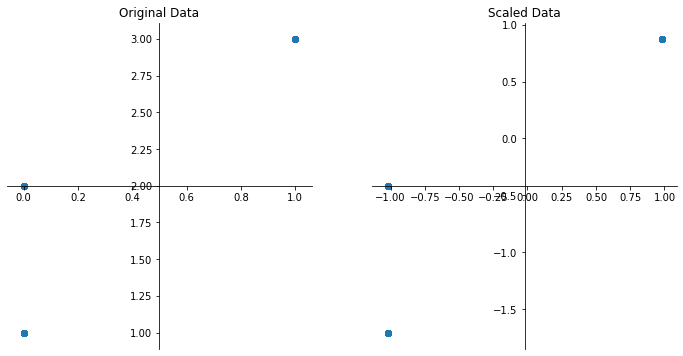

In [38]:
# Create your subplots
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

# Add title labels
axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

# Using your max x & y values, set the plot axis limits for your 
#maxx = X_train.max()
#maxy = y_train.max()
#axes1.set_xlim(-maxx - 100, maxx + 100)
#axes1.set_ylim(-maxy - 100, maxy + 100)

# Set limits for your scaled data
#axes2.set_xlim(-3, 3)
#axes2.set_ylim(-3, 3)

# Use a function to apply plot formatting, to avoid having to write it out twice
def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
# apply formatting function to each axis
set_axes(axes1)
set_axes(axes2)

# plot the original data and the scaled data
axes1.scatter(X_train["Type: Hybrid"], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

# Put it all together

In [63]:

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
print(model.score(X_test_scaled, y_test_scaled))

-2.6139147548857327e+26


### Step 1) Convert Categorical data to numbers using Integer or Binary Encoding

In [ ]:
X = pd.get_dummies(brain[["size", "gender", "age"]])
y = brain["weight"].values.reshape(-1, 1)
X.head()

### Step 2) Split data into training and testing data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Step 3) Scale or Normalize your data. Use StandardScaler if you don't know anything about your data.

In [ ]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

### Step 4) Fit the Model to the scaled training data and make predictions using the scaled test data

In [ ]:
# Generate the model and fit it to the scaled training data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

### Step 5) Plot the residuals

In [ ]:
# create a residuals plot using the predictions for both test and train data
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()

# create a horizontal line at y=0 to show how much error is in each prediction
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.xlabel("Prediction")
plt.show()

### Step 6) Quantify your model using the scaled data

In [ ]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")